# Predicting Purchase Behavior(PB) based on Attitude(ATTD), Social Norm(SN) and Purchase Behavioral Control(PBC)

# Installing Dependecies

# Importing libraries

In [1]:

import math
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib
import seaborn as sns #visualization
import json
import pickle #saving the model
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from statistics import stdev
from warnings import simplefilter

import warnings
warnings.filterwarnings('ignore')


# Importing Dataset

In [2]:
#reading the .xlsx dataset in to the dataframe
df1 = pd.read_excel("C:/Users/admin/Desktop/Predictive-Analysis/Baitaplon/Customer/Data/Data v1.0.xlsx")

In [3]:
df1.head()

,ID,Gender,Age,Ethnic,Occupation,Annual Income,Social Media usage,Experience of purchasing due to social media influence,Reviews and rating impact on purchasing decision,Average time spent on the Internet (weekly),...,Attitude 3 (ATTD3),Attitude 4 (ATTD4),Social Norms 1 (SN1),Social Norms 2 (SN2),Social Norms 3 (SN3),Social Norms 4 (SN4),Perceived Behavioural Control 1 (PBC1),Perceived Behavioural Control 2 (PBC2),Perceived Behavioural Control 3 (PBC3),Perceived Behavioural Control 4 (PBC4)
0,1,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,2,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,3,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,4,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,5,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree


In [4]:
df1.shape

(219, 27)

In [5]:
df1.columns

Index(['ID', 'Gender', 'Age', 'Ethnic', 'Occupation', 'Annual Income',
       'Social Media usage',
       'Experience of purchasing due to social media influence',
       'Reviews and rating impact on purchasing decision',
       'Average time spent on the Internet (weekly)',
       'Attention to advertisement on social media',
       'Purchase Behaviour 1 (PB1)', 'Purchase Behaviour 2 (PB2)',
       'Purchase Behaviour 3 (PB3)', 'Purchase Behaviour 4 (PB4)',
       'Attitude 1 (ATTD1)', 'Attitude 2 (ATTD2)', 'Attitude 3 (ATTD3)',
       'Attitude 4 (ATTD4)', 'Social Norms 1 (SN1)', 'Social Norms 2 (SN2)',
       'Social Norms 3 (SN3)', 'Social Norms 4 (SN4)',
       'Perceived Behavioural Control 1 (PBC1)',
       'Perceived Behavioural Control 2 (PBC2)',
       'Perceived Behavioural Control 3 (PBC3)',
       'Perceived Behavioural Control 4 (PBC4)'],
      dtype='object')

In [6]:
df1["Gender"].unique()

array(['Female', 'Male'], dtype=object)

# Exploratory Data Analysis (EDA)

In [7]:
#droping the column ID since it's not important
df2 = df1.drop(['ID'],axis=1)
df2.head()

,Gender,Age,Ethnic,Occupation,Annual Income,Social Media usage,Experience of purchasing due to social media influence,Reviews and rating impact on purchasing decision,Average time spent on the Internet (weekly),Attention to advertisement on social media,...,Attitude 3 (ATTD3),Attitude 4 (ATTD4),Social Norms 1 (SN1),Social Norms 2 (SN2),Social Norms 3 (SN3),Social Norms 4 (SN4),Perceived Behavioural Control 1 (PBC1),Perceived Behavioural Control 2 (PBC2),Perceived Behavioural Control 3 (PBC3),Perceived Behavioural Control 4 (PBC4)
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree


In [8]:
df2.rename(columns={'Annual Income': 'Annual_Income',
                   'Social Media usage': 'Social_Media_usage',
                   'Experience of purchasing due to social media influence': 'Experience',
                   'Reviews and rating impact on purchasing decision': 'Reviews_and_rating',
                   'Average time spent on the Internet (weekly)': 'ATI',
                   'Attention to advertisement on social media': 'ADSM',
                   'Purchase Behaviour 1 (PB1)': 'PB1',
                   'Purchase Behaviour 2 (PB2)': 'PB2',
                   'Purchase Behaviour 3 (PB3)': 'PB3',
                   'Purchase Behaviour 4 (PB4)': 'PB4',
                   'Attitude 1 (ATTD1)': 'ATTD1',
                   'Attitude 2 (ATTD2)': 'ATTD2',
                   'Attitude 3 (ATTD3)': 'ATTD3',
                   'Attitude 4 (ATTD4)': 'ATTD4',
                   'Social Norms 1 (SN1)': 'SN1',
                   'Social Norms 2 (SN2)': 'SN2',
                   'Social Norms 3 (SN3)': 'SN3',
                   'Social Norms 4 (SN4)': 'SN4',
                   'Perceived Behavioural Control 1 (PBC1)': 'PBC1',
                   'Perceived Behavioural Control 2 (PBC2)': 'PBC2',
                   'Perceived Behavioural Control 3 (PBC3)': 'PBC3',
                   'Perceived Behavioural Control 4 (PBC4)': 'PBC4',
                   },
          inplace=True, errors='raise')

In [9]:
df2.describe()

,Gender,Age,Ethnic,Occupation,Annual_Income,Social_Media_usage,Experience,Reviews_and_rating,ATI,ADSM,...,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4
count,219,219,219,219,219,219,219,219,219,219,...,219,219,219,219,219,219,219,219,219,219
unique,2,5,4,5,5,2,2,2,5,2,...,5,5,5,5,5,5,5,5,5,5
top,Female,23 - 28 Years Old,Chinese,Employee,"More than RM90,001",Yes,Yes,Yes,1 hour – 4 hours,Yes,...,Agree,Agree,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Neutral
freq,120,69,180,94,51,205,197,183,60,141,...,65,68,55,55,64,65,55,63,60,64


# DATA PREPROCESSING

In [10]:
#replacing the categorical value of PB, ATTD, SN and PBC to numerical value
df2 = df2.replace('Strongly agree',5)
df2 = df2.replace('Agree',4)
df2 = df2.replace('Neutral',3)
df2 = df2.replace('Disagree',2)
df2 = df2.replace('Strongly disagree',1)

In [11]:
# Merging PB1, PB2, PB3, PB4 to PB
df2['PB'] = df2['PB1'] + df2['PB2']+ df2['PB3']+ df2['PB4']

In [12]:
#Diving the PB target attribute to two class High and Low, we are using mean value 10 as diving criteria
#and Appending a new target attribute PB-inf
rating = []
for row in df2['PB']:
    if row<=12:
        rating.append('LOW')
    else:
        rating.append('HIGH')
df2['PB-inf'] = rating

In [13]:
df2.head()

,Gender,Age,Ethnic,Occupation,Annual_Income,Social_Media_usage,Experience,Reviews_and_rating,ATI,ADSM,...,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB,PB-inf
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,3,3,3,3,3,3,3,3,12,LOW
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,1,2,4,3,3,4,2,2,15,HIGH
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,1,1,1,1,1,1,1,1,5,LOW
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,3,3,4,4,3,4,3,4,15,HIGH
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,3,2,3,3,3,4,4,4,16,HIGH


<Axes: xlabel='PB', ylabel='Occupation'>

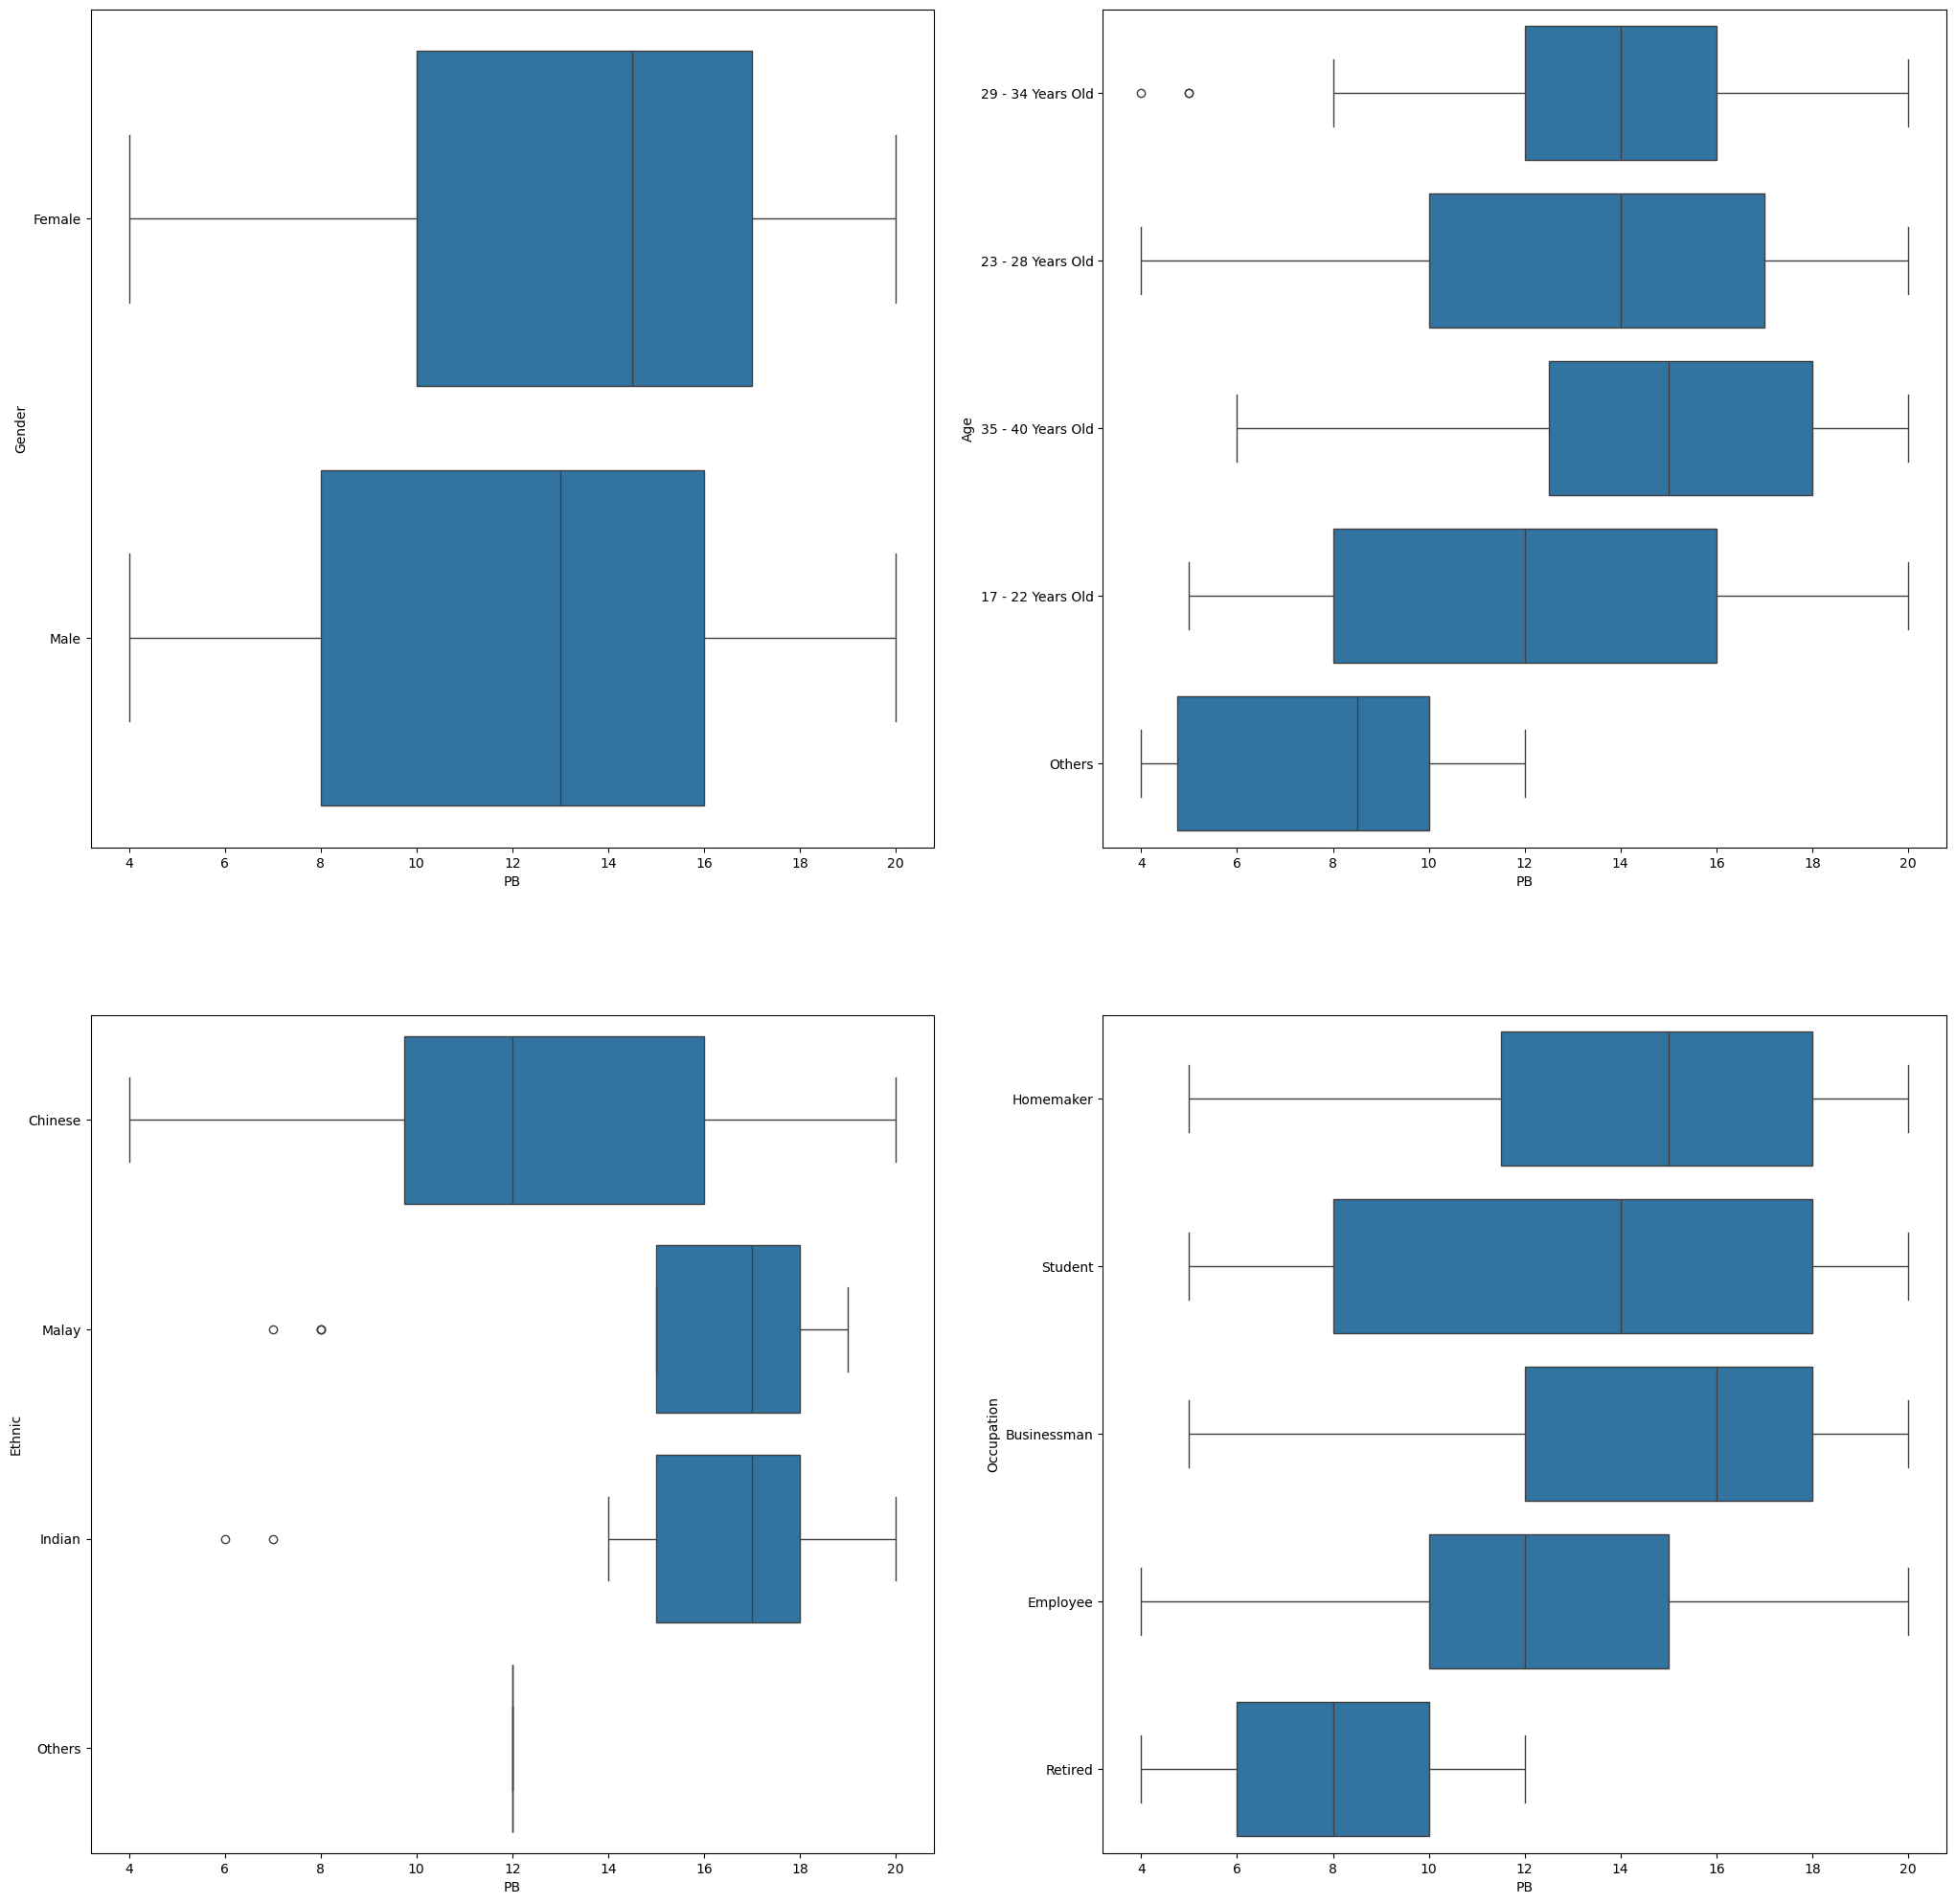

In [14]:
#set seaborn plotting aesthetics as default
# sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(25, 25))

#create boxplot in each subplot
sns.boxplot(data=df2, x='PB', y='Gender', ax=axes[0,0])
sns.boxplot(data=df2, x='PB', y='Age', ax=axes[0,1])
sns.boxplot(data=df2, x='PB', y='Ethnic', ax=axes[1,0])
sns.boxplot(data=df2, x='PB', y='Occupation', ax=axes[1,1])

<Axes: xlabel='PB', ylabel='Reviews_and_rating'>

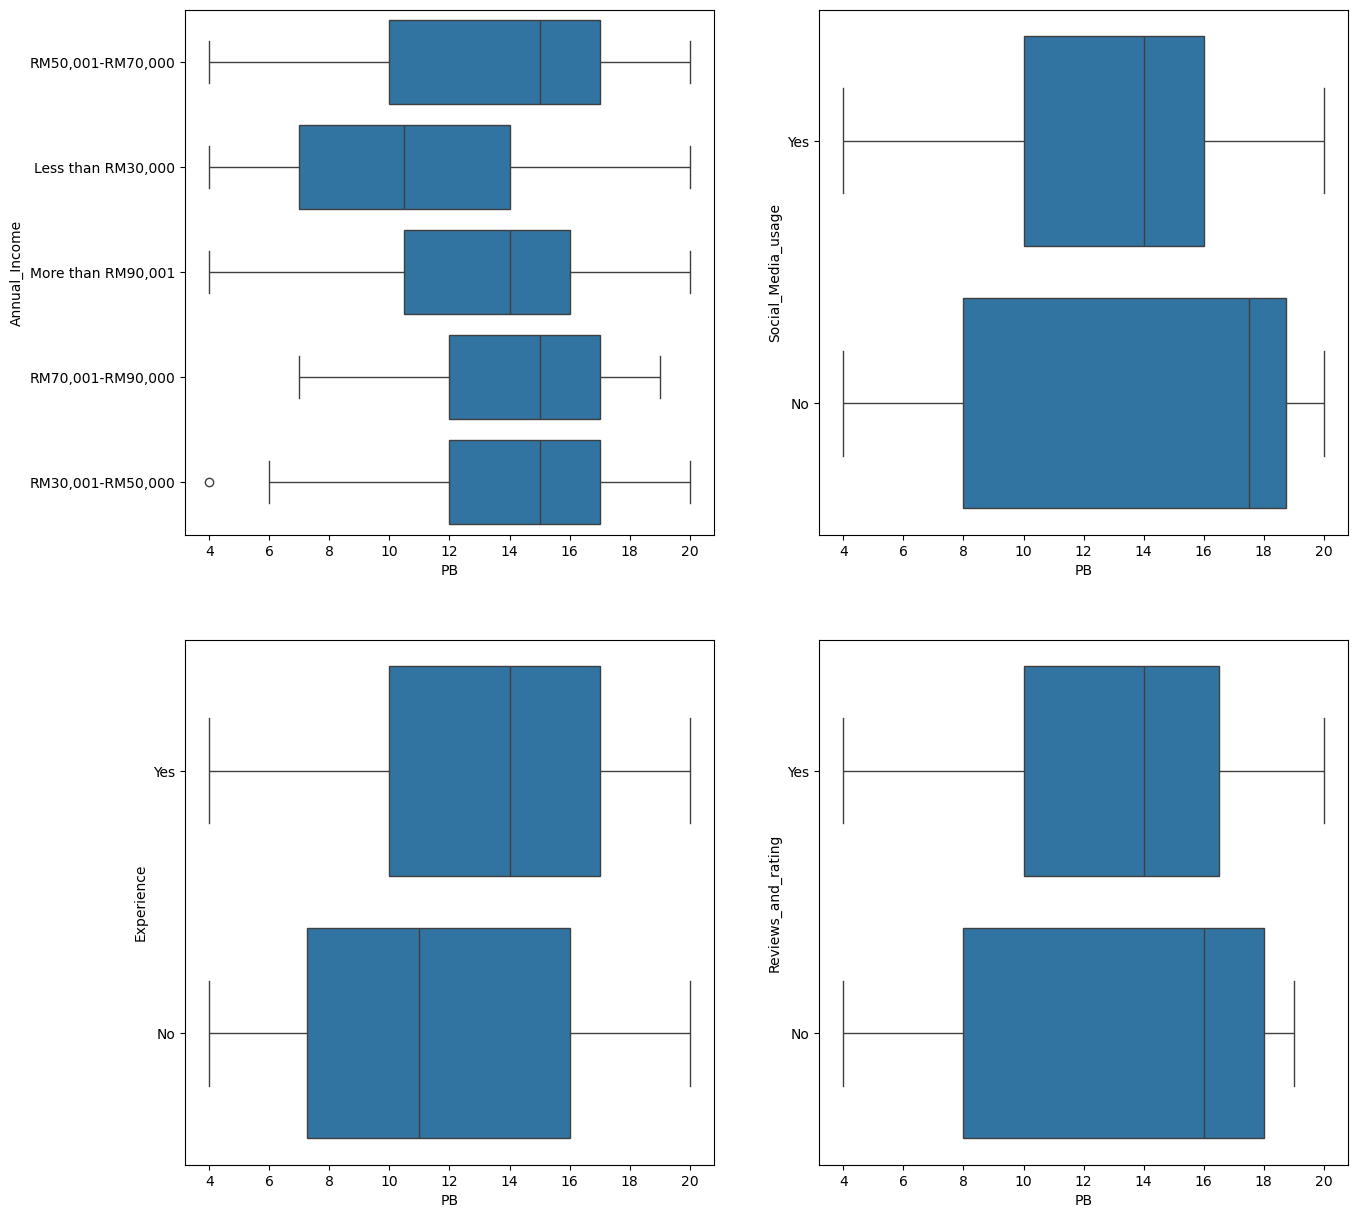

In [15]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

#create boxplot in each subplot
sns.boxplot(data=df2, x='PB', y='Annual_Income', ax=axes[0,0])
sns.boxplot(data=df2, x='PB', y='Social_Media_usage', ax=axes[0,1])
sns.boxplot(data=df2, x='PB', y='Experience', ax=axes[1,0])
sns.boxplot(data=df2, x='PB', y='Reviews_and_rating', ax=axes[1,1])

<Axes: xlabel='PB', ylabel='ADSM'>

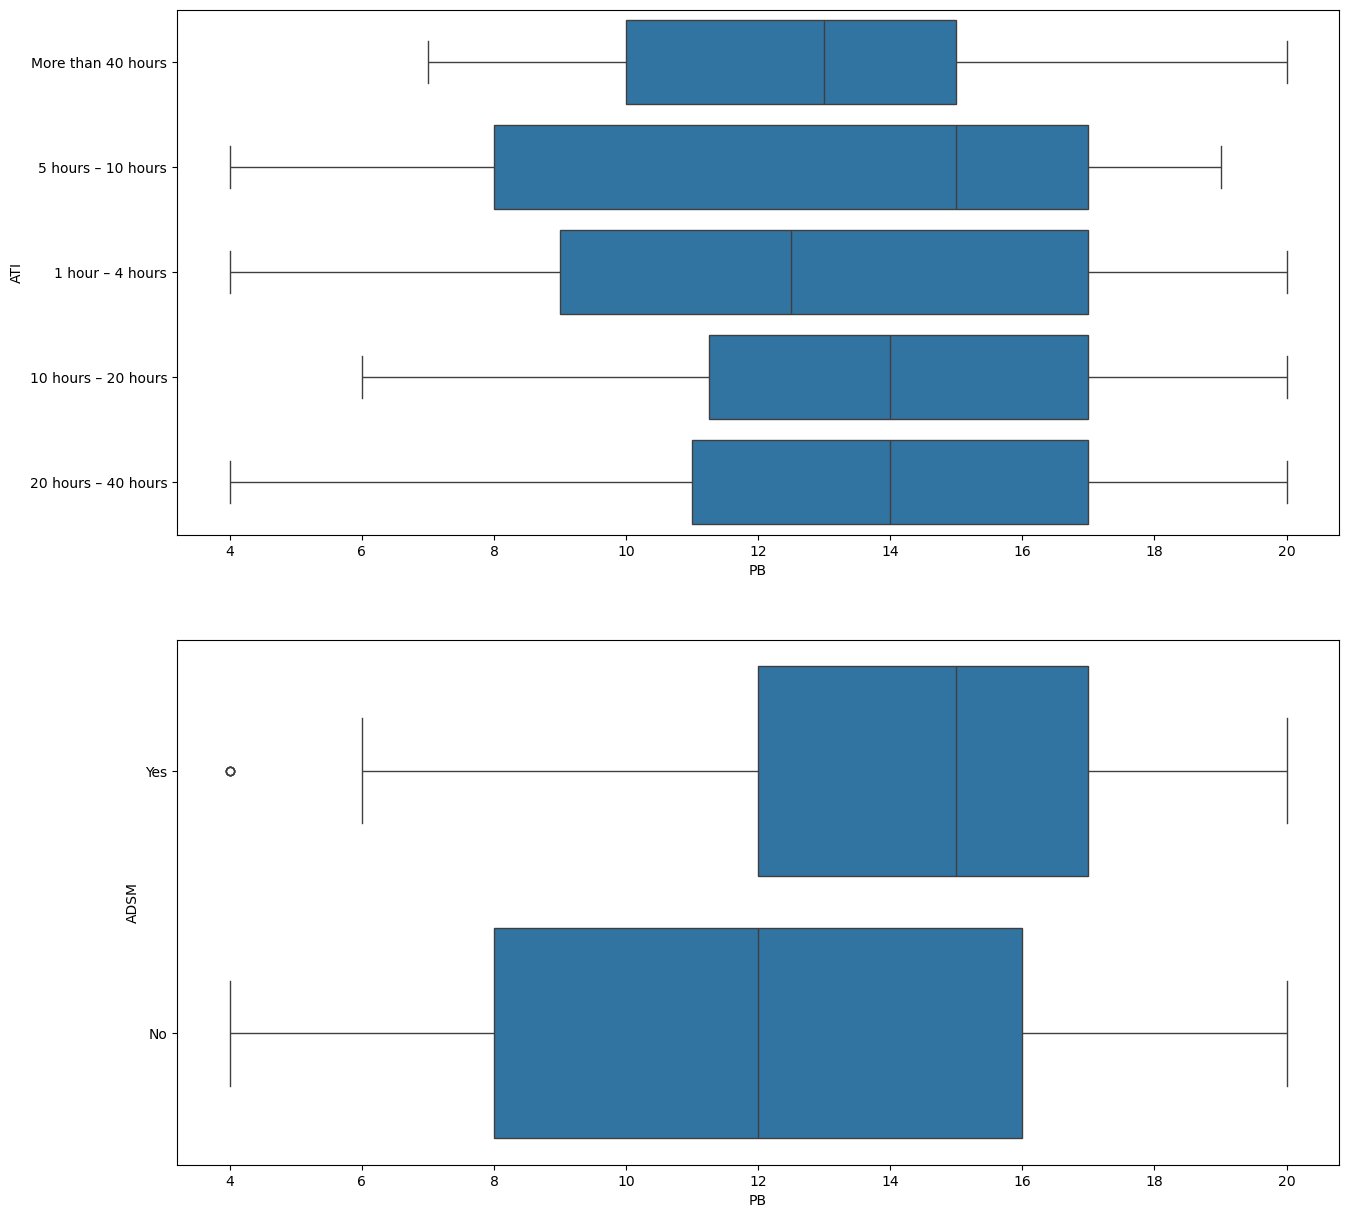

In [16]:
#define plotting region (2 rows, 1 columns)
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

#create boxplot in each subplot
sns.boxplot(data=df2, x='PB', y='ATI', ax=axes[0])
sns.boxplot(data=df2, x='PB', y='ADSM', ax=axes[1])

In [17]:
df3= df2.drop(columns = ['PB1','PB2','PB3','PB4','PB'], inplace = True)
print(df2.shape)
df2.head()

(219, 23)


,Gender,Age,Ethnic,Occupation,Annual_Income,Social_Media_usage,Experience,Reviews_and_rating,ATI,ADSM,...,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB-inf
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,3,3,3,3,3,3,3,3,3,LOW
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,3,1,2,4,3,3,4,2,2,HIGH
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,2,1,1,1,1,1,1,1,1,LOW
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,3,3,3,4,4,3,4,3,4,HIGH
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,4,3,2,3,3,3,4,4,4,HIGH


In [18]:
# Loại bỏ các cột không cần thiết
colsToDrop = ['Gender', 'Age', 'Ethnic', 'Occupation', 'Annual_Income',
              'Social_Media_usage', 'Experience', 'Reviews_and_rating', 'ATI', 'ADSM']
df2 = df2.drop(columns=colsToDrop)

# Tạo các cặp feature tương tác cụ thể giữa SN và PBC
# SN1 x PBC1, SN2 x PBC2, SN3 x PBC3, SN4 x PBC4
# SN2 x SN4, PBC1 x PBC3
df2['SN1_PBC1'] = df2['SN1'] * df2['PBC1']
df2['SN2_PBC2'] = df2['SN2'] * df2['PBC2']
df2['SN3_PBC3'] = df2['SN3'] * df2['PBC3']
df2['SN4_PBC4'] = df2['SN4'] * df2['PBC4']

# Tách X (features) và y (target)
y = df2['PB-inf']
# Kết hợp cả các đặc trưng cũ và mới trong X
X = df2[['ATTD1', 'ATTD2', 'ATTD3', 'ATTD4',
          'SN1', 'SN2', 'SN3', 'SN4',
          'PBC1', 'PBC2', 'PBC3', 'PBC4',
          'SN1_PBC1', 'SN2_PBC2', 'SN3_PBC3', 'SN4_PBC4'
          ]]

# Tách dữ liệu thành train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ZeroR Classifier

##### ZeroR classifer used to detect whether the dataset is balanced or not

In [19]:
# The Confusion matrix Function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):

    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dummy_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        HIGH       0.55      1.00      0.71        24
         LOW       0.00      0.00      0.00        20

    accuracy                           0.55        44
   macro avg       0.27      0.50      0.35        44
weighted avg       0.30      0.55      0.39        44

Train Accuracy:  0.5542857142857143
Test Accuracy:  0.5454545454545454


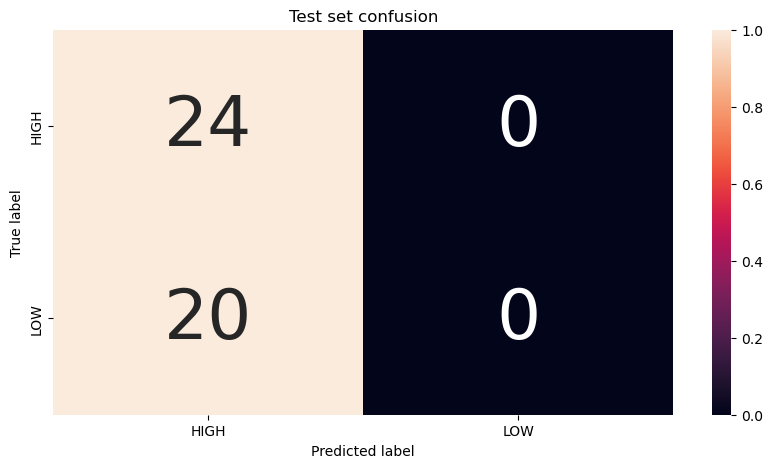

In [21]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=dummy_clf.classes_, title='Test set confusion')

# KNN Classifier

              precision    recall  f1-score   support

        HIGH       0.81      0.88      0.84        24
         LOW       0.83      0.75      0.79        20

    accuracy                           0.82        44
   macro avg       0.82      0.81      0.81        44
weighted avg       0.82      0.82      0.82        44

Train Accuracy:  0.92
Test Accuracy:  0.8181818181818182


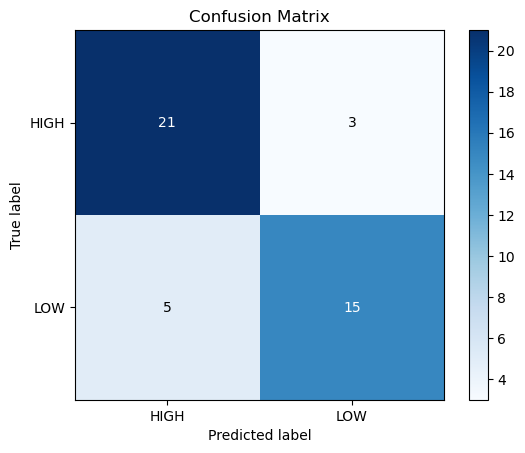

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Minkowski Distance Metric and K = 5
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

#plotting consusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

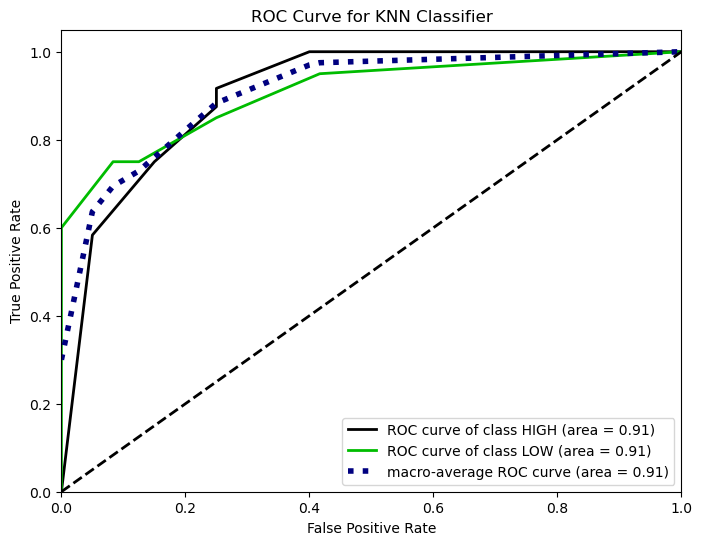

In [23]:
#plotting ROC curve
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for KNN Classifier");

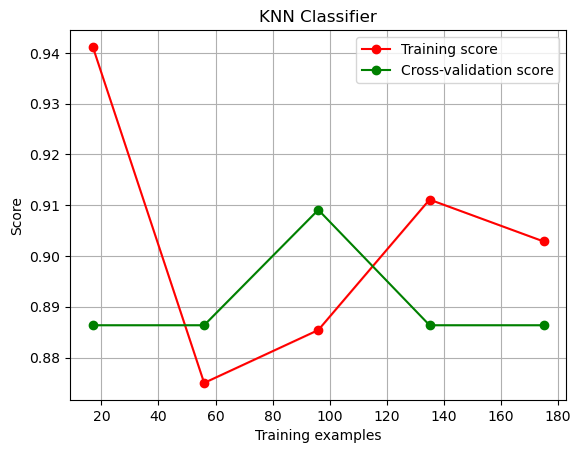

In [24]:
#Plotting learning curve
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(knn_clf, X, y, cv = cv,title = "KNN Classifier");

# Decision Tree Classifier

              precision    recall  f1-score   support

        HIGH       0.85      0.92      0.88        24
         LOW       0.89      0.80      0.84        20

    accuracy                           0.86        44
   macro avg       0.87      0.86      0.86        44
weighted avg       0.87      0.86      0.86        44

Train Accuracy:  0.9542857142857143
Test Accuracy:  0.8636363636363636


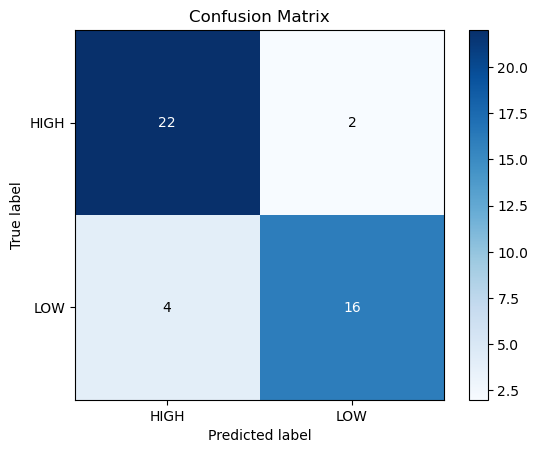

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5)
tree_clf.fit(X_train, y_train)
train_prediction = tree_clf.predict(X_train)
test_prediction = tree_clf.predict(X_test)

#plotting confusion matrix for DT
skplt.metrics.plot_confusion_matrix(y_test, test_prediction);
print(classification_report(y_test, test_prediction))
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))

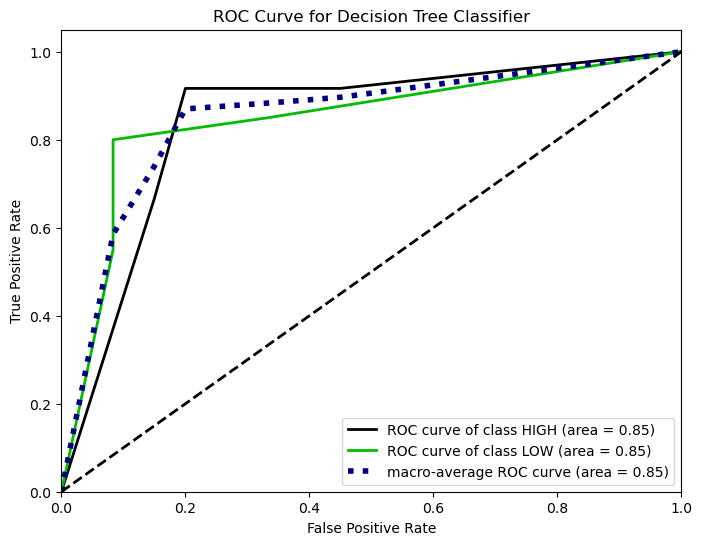

In [26]:
#Plotting ROC curve for DT
y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Decision Tree Classifier");

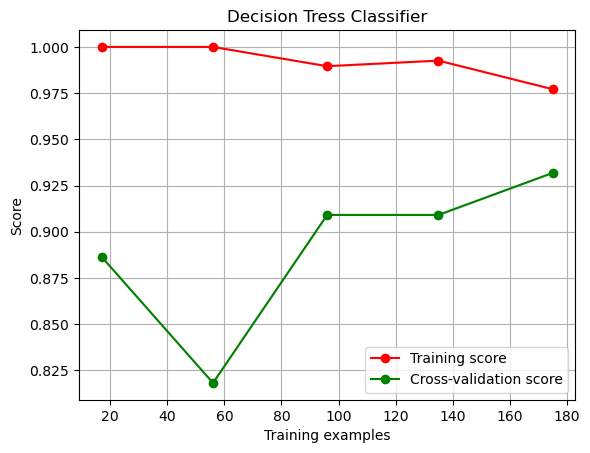

In [27]:
#Plotting learning curve for DT
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(tree_clf, X, y, cv = cv,title = "Decision Tress Classifier");

[Text(0.5357142857142857, 0.9166666666666666, 'x[3] <= 3.5\nentropy = 0.991\nsamples = 175\nvalue = [97, 78]'),
 Text(0.2857142857142857, 0.75, 'x[13] <= 10.5\nentropy = 0.672\nsamples = 85\nvalue = [15.0, 70.0]'),
 Text(0.21428571428571427, 0.5833333333333334, 'x[9] <= 2.5\nentropy = 0.439\nsamples = 77\nvalue = [7, 70]'),
 Text(0.14285714285714285, 0.4166666666666667, 'entropy = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(0.2857142857142857, 0.4166666666666667, 'x[0] <= 3.5\nentropy = 0.797\nsamples = 29\nvalue = [7, 22]'),
 Text(0.14285714285714285, 0.25, 'x[11] <= 4.5\nentropy = 0.634\nsamples = 25\nvalue = [4, 21]'),
 Text(0.07142857142857142, 0.08333333333333333, 'entropy = 0.544\nsamples = 24\nvalue = [3, 21]'),
 Text(0.21428571428571427, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42857142857142855, 0.25, 'x[3] <= 2.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.35714285714285715, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalu

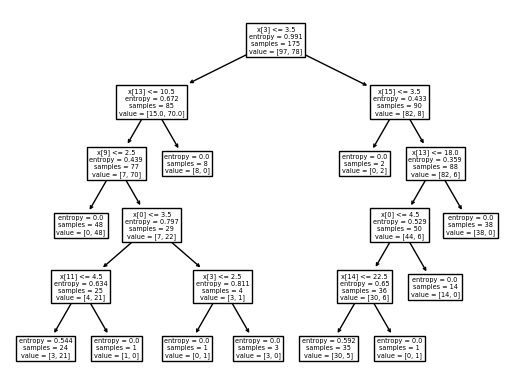

In [28]:
from sklearn import tree
tree.plot_tree(tree_clf)

# Logistic Regression

              precision    recall  f1-score   support

        HIGH       0.92      0.92      0.92        24
         LOW       0.90      0.90      0.90        20

    accuracy                           0.91        44
   macro avg       0.91      0.91      0.91        44
weighted avg       0.91      0.91      0.91        44

Train Accuracy 0.8914285714285715
Test Accuracy 0.9090909090909091


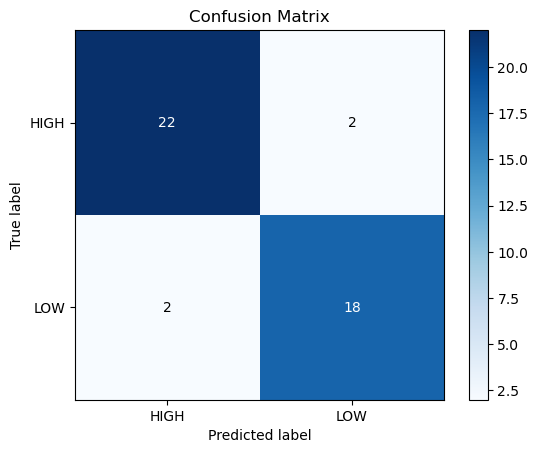

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression(C =0.1, solver ='newton-cg')
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

#ploting confusion matrix for logistic regression
skplt.metrics.plot_confusion_matrix(y_test, pred_test);
print(classification_report(y_test, pred_test))
print("Train Accuracy", accuracy_score(y_train, pred_train))
print("Test Accuracy", accuracy_score(y_test, pred_test))

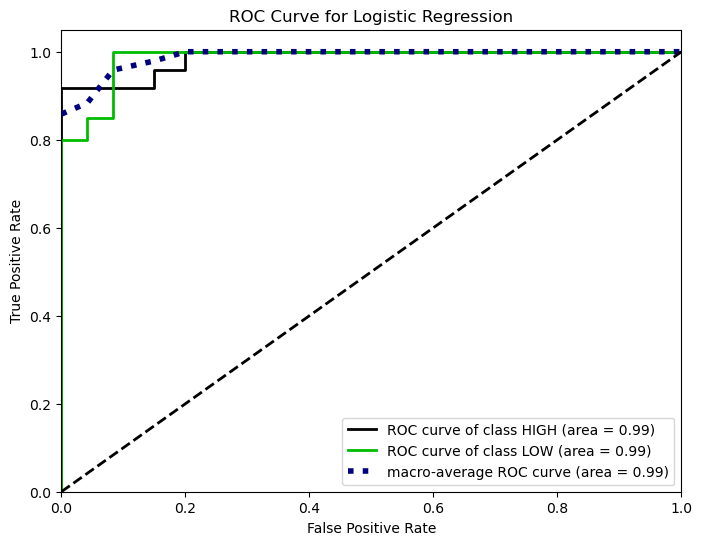

In [30]:
#ploting ROC curve for logistic regression
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Logistic Regression");

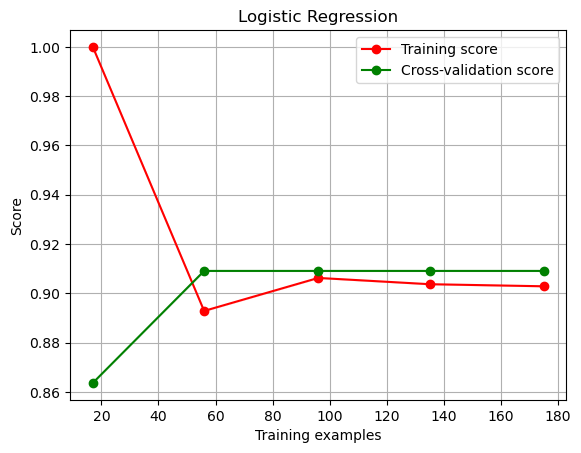

In [31]:
#ploting learning curve for logistic regression
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(model, X, y, cv = cv,title = "Logistic Regression");

# Naive Bayes Classifier

              precision    recall  f1-score   support

        HIGH       0.92      0.96      0.94        24
         LOW       0.95      0.90      0.92        20

    accuracy                           0.93        44
   macro avg       0.93      0.93      0.93        44
weighted avg       0.93      0.93      0.93        44

Train Accuracy 0.8742857142857143
Test Accuracy 0.9318181818181818


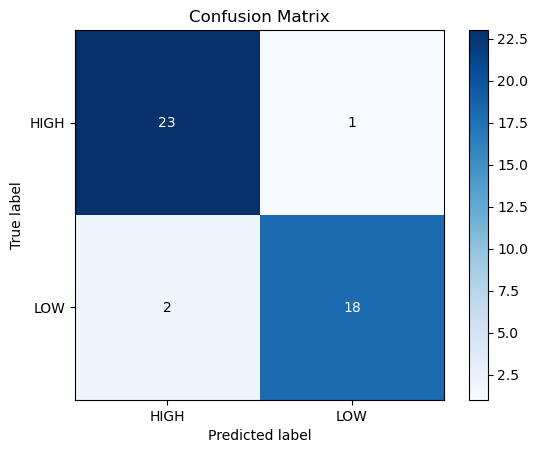

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)

#ploting confusion matrix for Naive Bayes
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(y_train, naive.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, naive.predict(X_test)))

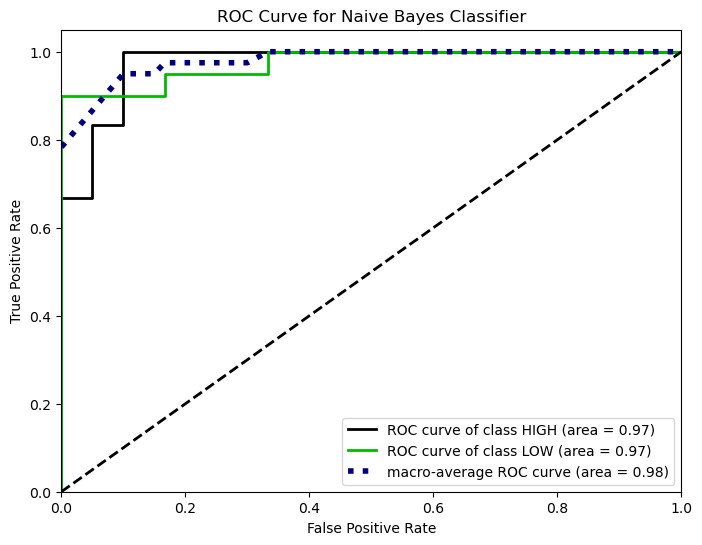

In [33]:
#ploting ROC for Naive Bayes
y_probas = naive.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Naive Bayes Classifier");

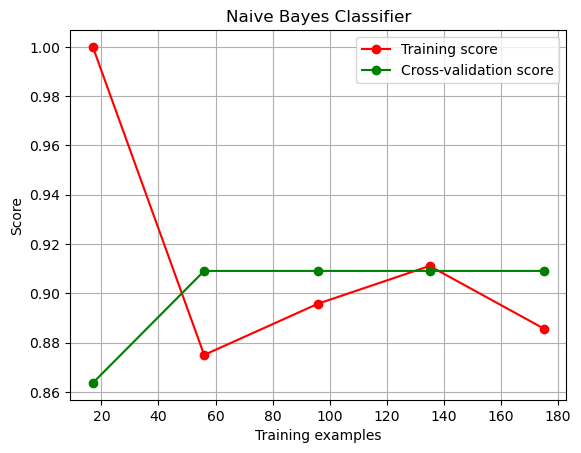

In [34]:
#ploting learning curve for Naive Bayes
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(naive, X, y, cv = cv,
                      title = "Naive Bayes Classifier");

# Support Vector Machine (SVM) Classifier

              precision    recall  f1-score   support

        HIGH       0.92      0.92      0.92        24
         LOW       0.90      0.90      0.90        20

    accuracy                           0.91        44
   macro avg       0.91      0.91      0.91        44
weighted avg       0.91      0.91      0.91        44

Train Accuracy 0.92
Test Accuracy 0.9090909090909091


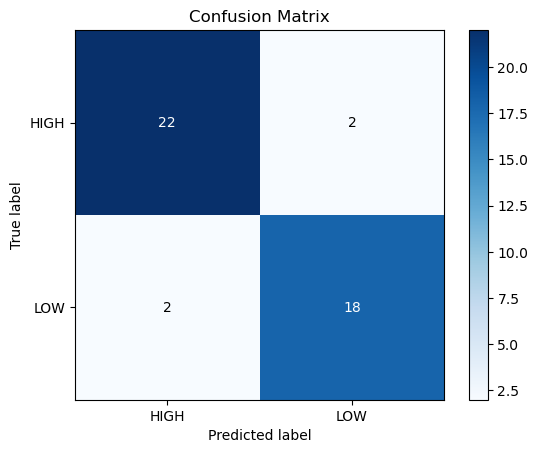

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm = SVC(C =0.1, gamma='scale', kernel='linear',probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#ploting confusion matrix for SVM
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(svm.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(svm.predict(X_test), y_test))

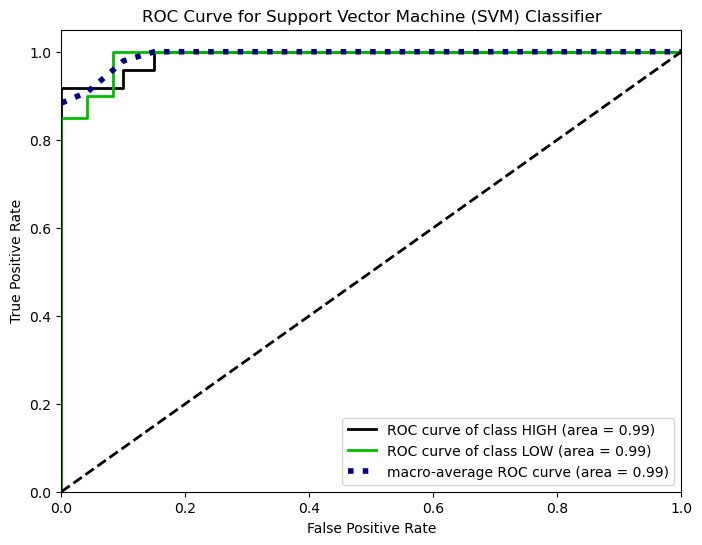

In [36]:
#ploting ROC curve for SVM
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Support Vector Machine (SVM) Classifier");

# Ensemble Classifiers

## Random Forest Classifier

              precision    recall  f1-score   support

        HIGH       0.92      1.00      0.96        24
         LOW       1.00      0.90      0.95        20

    accuracy                           0.95        44
   macro avg       0.96      0.95      0.95        44
weighted avg       0.96      0.95      0.95        44

Train Accuracy 0.9771428571428571
Test Accuracy 0.9545454545454546


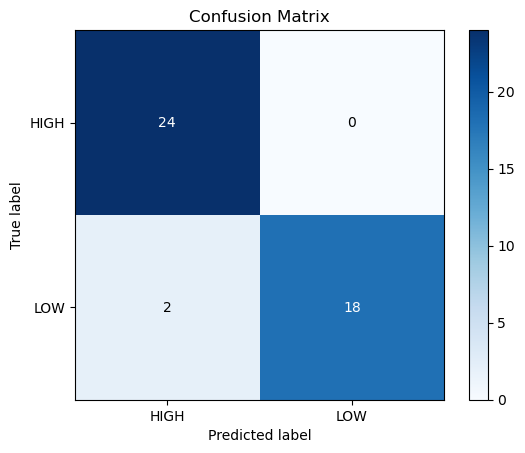

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(criterion='gini', max_depth= 6, n_estimators =100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#ploting confusion matrix for RF
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(clf.predict(X_test), y_test))

# AdaBoost Classifier

              precision    recall  f1-score   support

        HIGH       0.92      0.96      0.94        24
         LOW       0.95      0.90      0.92        20

    accuracy                           0.93        44
   macro avg       0.93      0.93      0.93        44
weighted avg       0.93      0.93      0.93        44

Train Accuracy 0.9314285714285714
Test Accuracy 0.9318181818181818


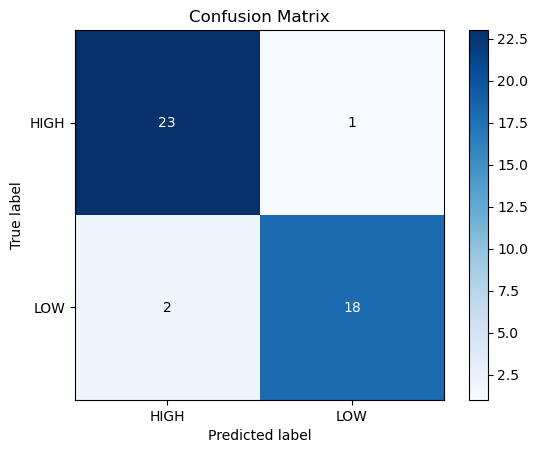

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Ada_clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=50)
Ada_clf.fit(X_train, y_train)
y_pred = Ada_clf.predict(X_test)

#ploting confusion matrix for AdaBoost
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(Ada_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(Ada_clf.predict(X_test), y_test))

#Gradient Boosting Classifier

              precision    recall  f1-score   support

        HIGH       0.92      1.00      0.96        24
         LOW       1.00      0.90      0.95        20

    accuracy                           0.95        44
   macro avg       0.96      0.95      0.95        44
weighted avg       0.96      0.95      0.95        44

Train Accuracy 0.9885714285714285
Test Accuracy 0.9545454545454546


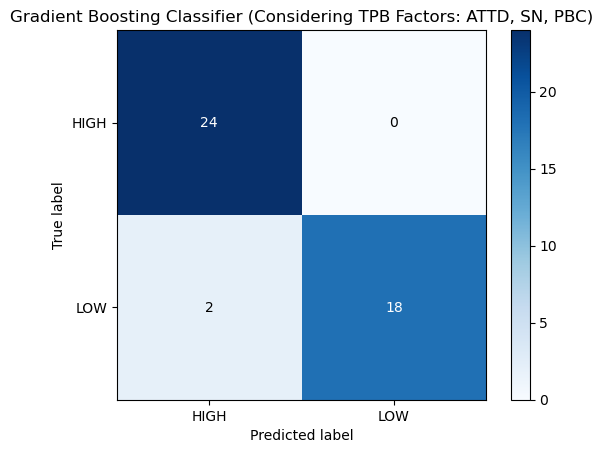

In [39]:

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

xgb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=2)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

#plotting confusion matrix for GB
skplt.metrics.plot_confusion_matrix(y_test, y_pred,title = "Gradient Boosting Classifier (Considering TPB Factors: ATTD, SN, PBC)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(xgb_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(xgb_clf.predict(X_test), y_test))

In [40]:

#Deep Neural Network - DNN
# Import TensorFlow for deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
# Encode target variable for deep learning
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42, stratify=y_onehot)

# Build deep learning model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Predict and generate classification report
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba.argmax(axis=1)

# Convert predictions to string labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Use true labels directly as strings
y_true = label_encoder.inverse_transform(y_test.argmax(axis=1))

# Generate classification report
print(classification_report(y_true, y_pred_labels, target_names=['Low', 'High']))

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5275 - loss: 0.6906 - val_accuracy: 0.8864 - val_loss: 0.3489
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8339 - loss: 0.4261 - val_accuracy: 0.8864 - val_loss: 0.2428
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8582 - loss: 0.4025 - val_accuracy: 0.9091 - val_loss: 0.1941
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8793 - loss: 0.3449 - val_accuracy: 0.9091 - val_loss: 0.1762
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8830 - loss: 0.3196 - val_accuracy: 0.9091 - val_loss: 0.1693
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8803 - loss: 0.3216 - val_accuracy: 0.9091 - val_loss: 0.1639
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9277 - loss: 0.2529 - val_accuracy: 0.9318 - val_loss: 0.1594
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8988 - loss: 0.2843 - val_accuracy: 0.9318 - val_loss

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.6633 - loss: 0.6446 - val_accuracy: 0.8636 - val_loss: 0.3077
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7925 - loss: 0.4334 - val_accuracy: 0.9318 - val_loss: 0.2219
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8591 - loss: 0.3228 - val_accuracy: 0.9318 - val_loss: 0.1936
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9045 - loss: 0.3098 - val_accuracy: 0.9091 - val_loss: 0.1865
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9161 - loss: 0.2791 - val_accuracy: 0.9318 - val_loss: 0.1831
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9043 - loss: 0.2731 - val_accuracy: 0.9318 - val_loss: 0.1809
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8851 - loss: 0.3564 - val_accuracy: 0.9318 - val_loss: 0.1793
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9029 - loss: 0.2931 - val_accuracy: 0.9318 - val_loss: 0.1782
Ep

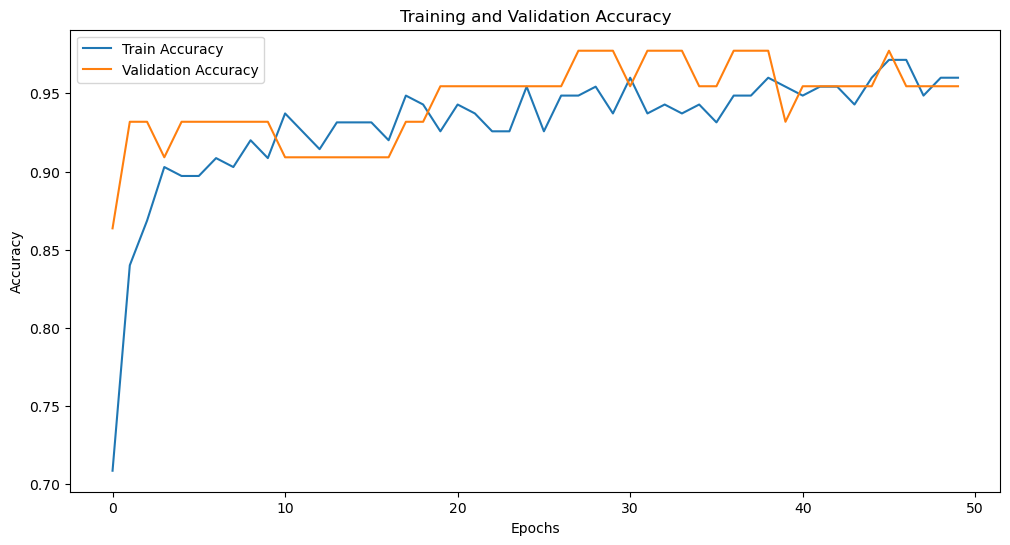

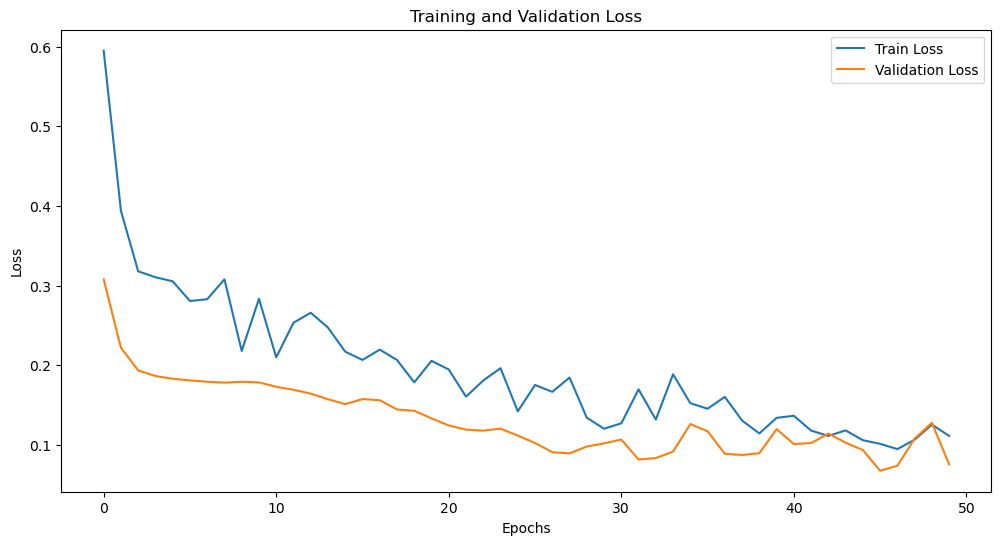

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Chuẩn bị dữ liệu
# Lựa chọn các cột đặc trưng gốc và đặc trưng tương tác
X = df2[['ATTD1', 'ATTD2', 'ATTD3', 'ATTD4',
         'SN1', 'SN2', 'SN3', 'SN4',
         'PBC1', 'PBC2', 'PBC3', 'PBC4',
         'SN1_PBC1', 'SN2_PBC2', 'SN3_PBC3', 'SN4_PBC4']].values
y = df2['PB-inf']

# Encode nhãn mục tiêu
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Thêm một chiều cho dữ liệu đầu vào để phù hợp với Transformer
X_train = X_train[:, np.newaxis, :]
X_test = X_test[:, np.newaxis, :]

# Kích thước đầu vào và số lớp
input_dim = X_train.shape[-1]
num_classes = len(np.unique(y_encoded))

# Hàm Transformer Block
def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Multi-head attention
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attention = Dropout(dropout)(attention)
    attention = LayerNormalization(epsilon=1e-6)(attention + inputs)
    
    # Feed Forward
    ff = Dense(ff_dim, activation="relu")(attention)
    ff = Dropout(dropout)(ff)
    ff = Dense(inputs.shape[-1])(ff)
    return LayerNormalization(epsilon=1e-6)(ff + attention)

# Xây dựng mô hình Transformer
inputs = Input(shape=(None, input_dim))
x = transformer_block(inputs, head_size=64, num_heads=4, ff_dim=128)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation="softmax")(x)

model = Model(inputs, outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Huấn luyện mô hình Transformer
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Đánh giá mô hình
y_pred = model.predict(X_test).argmax(axis=1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Vẽ đồ thị lịch sử huấn luyện
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
